In [1]:
# COMP 5300 Final Project
# Musculoskeletal Abnormality Detection
# Michelle, Jennifer, Amelia, Deva

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
%matplotlib inline
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2024-04-18 01:12:02.029086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 01:12:02.603569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Display file directory tree
def print_file_directory(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 3 * level
        subindent = ' ' * 3 * (level + 1)
        print('{}{}/'.format(indent, os.path.basename(root)))
        for f in files:
            print('{}{}'.format(subindent, f))

In [4]:
print_file_directory('MURA-v1.1')

MURA-v1.1/
   train_labeled_studies.csv
   train_image_paths.csv
   valid_image_paths.csv
   valid_labeled_studies.csv
   train/
      XR_FOREARM/
         patient09232/
            study1_positive/
               image2.png
               image1.png
         patient09202/
            study1_positive/
               image2.png
               image1.png
         patient09396/
            study1_negative/
               image2.png
               image1.png
         patient09567/
            study1_negative/
               image2.png
               image1.png
         patient09515/
            study1_negative/
               image2.png
               image1.png
         patient09139/
            study1_positive/
               image2.png
               image1.png
         patient09235/
            study1_positive/
               image2.png
               image1.png
         patient09663/
            study1_negative/
               image2.png
               image3.png
               image1

         patient01303/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient01205/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient02314/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient01819/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient01718/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient00636/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient01404/
            study1_positive/
               image2.png
               image3.png
            

         patient11573/
            study1_negative/
               image2.png
               image1.png
         patient11333/
            study1_positive/
               image2.png
               image1.png
         patient11527/
            study1_positive/
               image2.png
               image1.png
         patient11190/
            study1_negative/
               image2.png
               image3.png
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
         patient11517/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient11581/
            study1_negative/
               image2.png
               image1.png
         patient11556/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient11559/
            study1_negative/
               image2.png
         

In [5]:
# Remove .DS_Store if needed
# ! find . -name '.DS_Store' -type f -delete

In [6]:
# Images stored and separated in folders by upper extremity study type
os.listdir('MURA-v1.1/train')

['XR_FOREARM',
 'XR_HAND',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_HUMERUS',
 'XR_ELBOW']

In [7]:
os.listdir('MURA-v1.1/valid')

['XR_FOREARM',
 'XR_HAND',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_HUMERUS',
 'XR_ELBOW']

In [8]:
# Restructure and consolidate data with image paths and labels
# Example path: MURA-v1.1/train/XR_HAND/patient05509/study1_negative/image1.png

def restructure_dataset(path):
    data = []
    
    for study_type in os.listdir(path):
        # Get study type path to access patient folders
        study_type_path = path + '/' + str(study_type)

        for patient_id in os.listdir(study_type_path):
            # Get patient id path to access study folders
            study_id = study_type_path + '/' + str(patient_id)
            for label in os.listdir(study_id):
                # Get abnormality label as positive (1) or negative (0)
                if label.split('_')[-1] == 'positive': 
                    num_label = 1
                elif label.split('_')[-1] == 'negative':
                    num_label = 0

                # Get study id and label path to access image folders
                label_path = study_id + '/' + str(label)
                for img in os.listdir(label_path):
                    img_path = label_path + '/' + str(img)

                    # Add data to array
                    data.append(
                        {
                            'study_type': study_type,
                            'patient_id': patient_id,
                            'img_path': img_path,
                            'label': num_label,
                        }
                    )
    return data

In [9]:
# Consolidate all training data into single dataframe 
df_train = pd.DataFrame(restructure_dataset('MURA-v1.1/train'))
df_train.head()

study_type    patient_id  \
0  XR_FOREARM  patient09232   
1  XR_FOREARM  patient09232   
2  XR_FOREARM  patient09202   
3  XR_FOREARM  patient09202   
4  XR_FOREARM  patient09396   

                                            img_path  label  
0  MURA-v1.1/train/XR_FOREARM/patient09232/study1...      1  
1  MURA-v1.1/train/XR_FOREARM/patient09232/study1...      1  
2  MURA-v1.1/train/XR_FOREARM/patient09202/study1...      1  
3  MURA-v1.1/train/XR_FOREARM/patient09202/study1...      1  
4  MURA-v1.1/train/XR_FOREARM/patient09396/study1...      0

In [10]:
df_train.shape

(36812, 4)

In [11]:
df_train.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [12]:
# Preprocessing & stratified sampling to get validation dataset

df_train['combined_study_type_label'] = df_train['study_type'] + '_' + df_train['label'].astype(str)

df_train, df_valid = train_test_split(df_train, test_size = 0.1, stratify = df_train['combined_study_type_label'])

df_train = df_train.drop(columns=['combined_study_type_label'])
df_valid = df_valid.drop(columns=['combined_study_type_label'])

In [13]:
df_train.head()

study_type    patient_id  \
23666     XR_WRIST  patient06842   
21970     XR_WRIST  patient08295   
27336     XR_WRIST  patient00081   
12637  XR_SHOULDER  patient01831   
23843     XR_WRIST  patient08676   

                                                img_path  label  
23666  MURA-v1.1/train/XR_WRIST/patient06842/study1_p...      1  
21970  MURA-v1.1/train/XR_WRIST/patient08295/study1_n...      0  
27336  MURA-v1.1/train/XR_WRIST/patient00081/study1_p...      1  
12637  MURA-v1.1/train/XR_SHOULDER/patient01831/study...      0  
23843  MURA-v1.1/train/XR_WRIST/patient08676/study1_n...      0

In [14]:
df_train.shape

(33130, 4)

In [15]:
df_valid.head()

study_type    patient_id  \
28547     XR_WRIST  patient06997   
15679  XR_SHOULDER  patient00248   
20609  XR_SHOULDER  patient00890   
17302  XR_SHOULDER  patient00185   
25896     XR_WRIST  patient07839   

                                                img_path  label  
28547  MURA-v1.1/train/XR_WRIST/patient06997/study1_p...      1  
15679  MURA-v1.1/train/XR_SHOULDER/patient00248/study...      1  
20609  MURA-v1.1/train/XR_SHOULDER/patient00890/study...      1  
17302  MURA-v1.1/train/XR_SHOULDER/patient00185/study...      1  
25896  MURA-v1.1/train/XR_WRIST/patient07839/study1_n...      0

In [16]:
df_valid.shape

(3682, 4)

In [17]:
# Consolidate all test data into single dataframe
df_test = pd.DataFrame(restructure_dataset('MURA-v1.1/valid'))
df_test.head()

study_type    patient_id  \
0  XR_FOREARM  patient11463   
1  XR_FOREARM  patient11463   
2  XR_FOREARM  patient11449   
3  XR_FOREARM  patient11449   
4  XR_FOREARM  patient11408   

                                            img_path  label  
0  MURA-v1.1/valid/XR_FOREARM/patient11463/study1...      0  
1  MURA-v1.1/valid/XR_FOREARM/patient11463/study1...      0  
2  MURA-v1.1/valid/XR_FOREARM/patient11449/study1...      0  
3  MURA-v1.1/valid/XR_FOREARM/patient11449/study1...      0  
4  MURA-v1.1/valid/XR_FOREARM/patient11408/study1...      1

In [18]:
df_test.shape

(3197, 4)

In [19]:
df_test.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [20]:
# Find problematic images and remove them from the dataset (amelia)
# https://stackoverflow.com/questions/71572762/cannot-identify-image-file-io-bytesio-object-at-0x000001e6cf13a108
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

all_image_paths = []
all_image_paths.extend(df_train['img_path'])
all_image_paths.extend(df_valid['img_path'])
all_image_paths.extend(df_test['img_path'])

problem_paths = []

for img_p in all_image_paths:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)
        problem_paths.append(img_p)

for prob_path in problem_paths:
    df_train.drop(df_train.loc[df_train['img_path']==prob_path].index, inplace=True)
    df_valid.drop(df_valid.loc[df_valid['img_path']==prob_path].index, inplace=True)
    df_test.drop(df_test.loc[df_test['img_path']==prob_path].index, inplace=True)

MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image2.png
MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image3.png
MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/._image1.png
MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image1.png


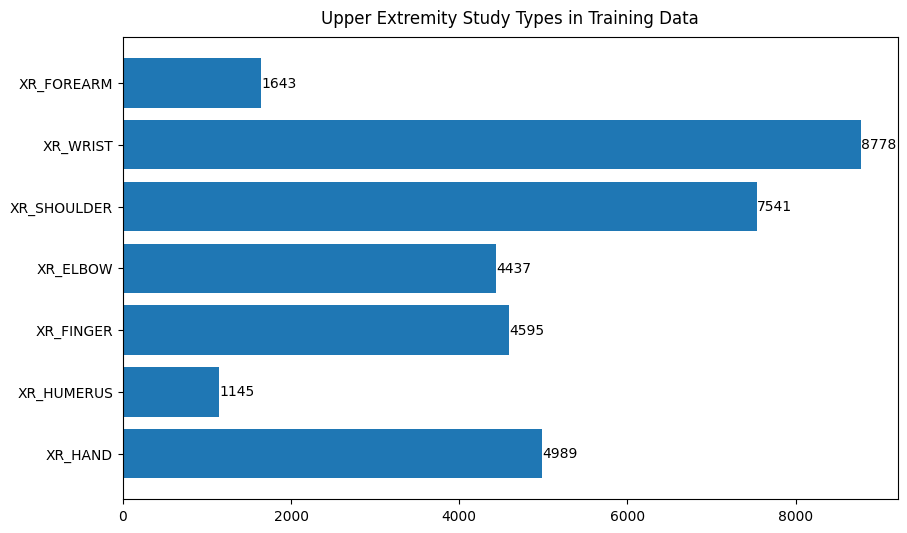

In [21]:
# Exploratory analysis
study_types = ['XR_HAND', 'XR_HUMERUS', 'XR_FINGER', 'XR_ELBOW', 'XR_SHOULDER', 'XR_WRIST', 'XR_FOREARM']

def print_type_values(df, title):
    study_counts = {}
    for study_type in study_types:
        study_counts[study_type] = (df.study_type == study_type).sum()
        
    fig, ax = plt.subplots(figsize = (10, 6))
    bars = ax.barh(list(study_counts.keys()), list(study_counts.values()))
    ax.bar_label(bars)
    plt.title(title, pad = 10)
    plt.show()

print_type_values(df_train, "Upper Extremity Study Types in Training Data")

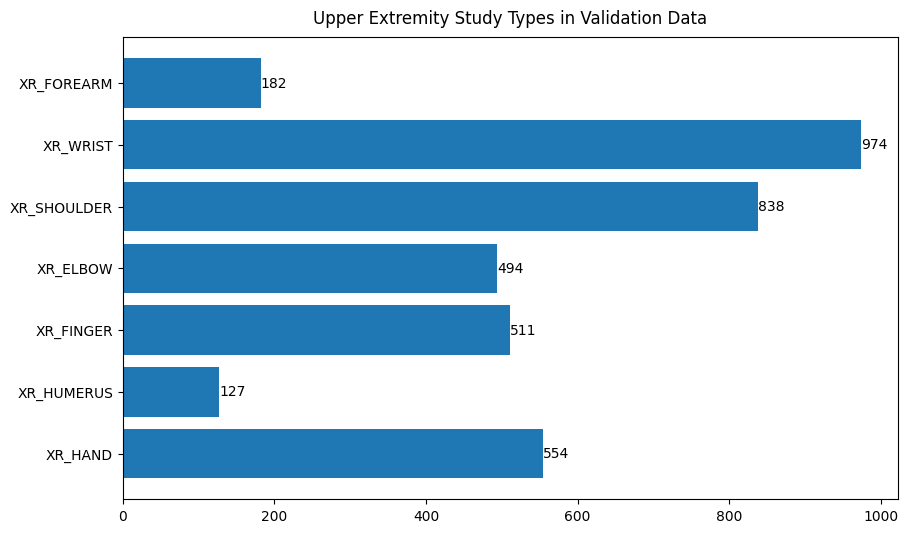

In [22]:
print_type_values(df_valid, "Upper Extremity Study Types in Validation Data")

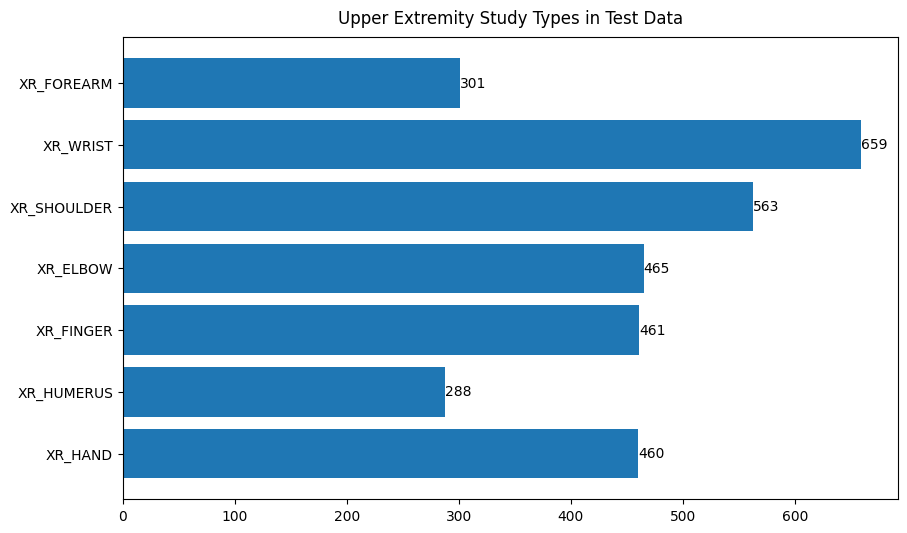

In [23]:
print_type_values(df_test, "Upper Extremity Study Types in Test Data")

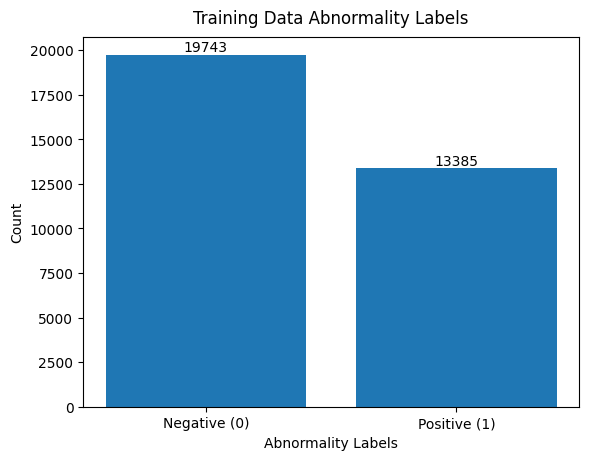

In [24]:
def print_labels(df, title):
    
    value_counts = df['label'].value_counts()
    
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Abnormality Labels')
    plt.ylabel('Count')
    plt.title(title, pad = 10)
    plt.xticks(value_counts.index, ['Negative (0)', 'Positive (1)'])
    for bar, count in zip(bars, value_counts.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha = 'center', va = 'bottom')
    
    plt.show()

print_labels(df_train, "Training Data Abnormality Labels")

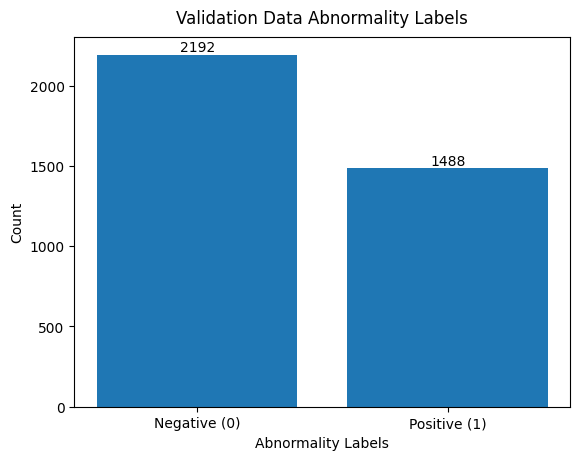

In [25]:
print_labels(df_valid, "Validation Data Abnormality Labels")

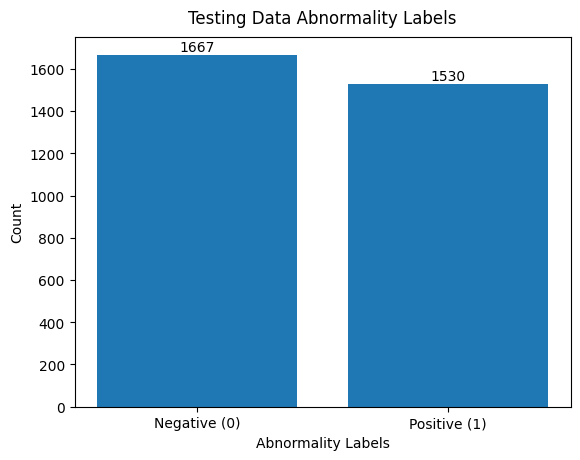

In [26]:
print_labels(df_test, "Testing Data Abnormality Labels")

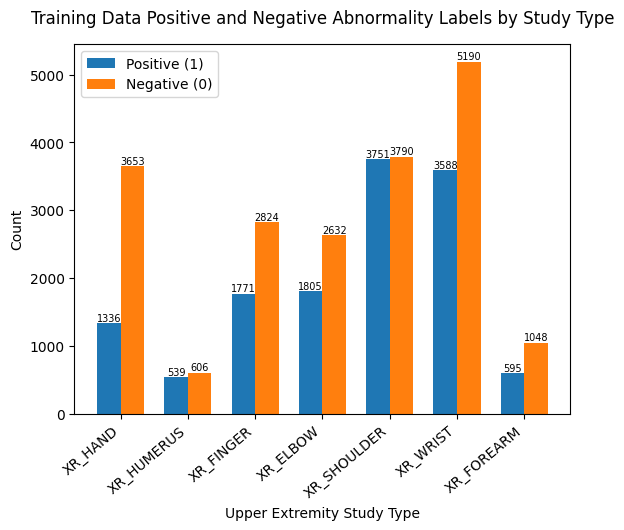

In [27]:
def print_labels_by_study_type(df, title):
    study_type_counts = []
    for study_type in study_types:
        positive_count = ((df.study_type == study_type) & (df.label == 1)).sum()
        negative_count = ((df.study_type == study_type) & (df.label == 0)).sum()
        study_type_counts.append((positive_count, negative_count))

    x = np.arange(len(study_types))
    width = 0.35
    
    fig, ax = plt.subplots()

    # Plot values
    positive_bars = ax.bar(x - width / 2, [count[0] for count in study_type_counts], width, label = 'Positive (1)')
    negative_bars = ax.bar(x + width / 2, [count[1] for count in study_type_counts], width, label = 'Negative (0)')
    ax.set_xlabel('Upper Extremity Study Type')
    ax.set_ylabel('Count')
    ax.set_title(title, pad = 15)
    ax.set_xticks(x)
    ax.set_xticklabels(study_types, rotation = 40, ha = 'right')
    ax.legend()
    
    for bar in positive_bars + negative_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 7)
    
    plt.show()

print_labels_by_study_type(df_train, "Training Data Positive and Negative Abnormality Labels by Study Type")

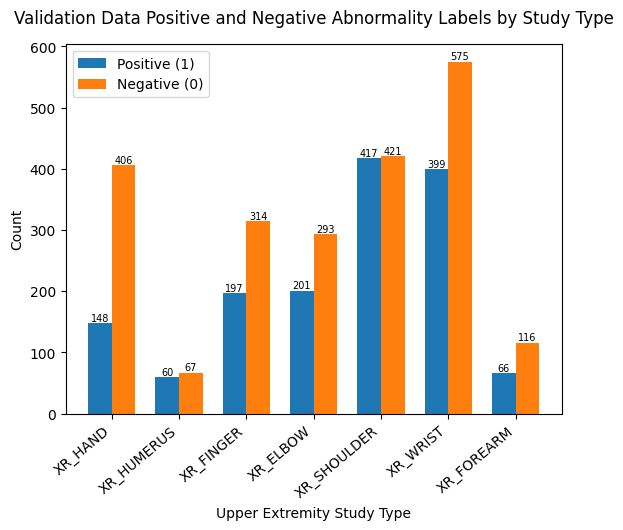

In [28]:
print_labels_by_study_type(df_valid, "Validation Data Positive and Negative Abnormality Labels by Study Type")

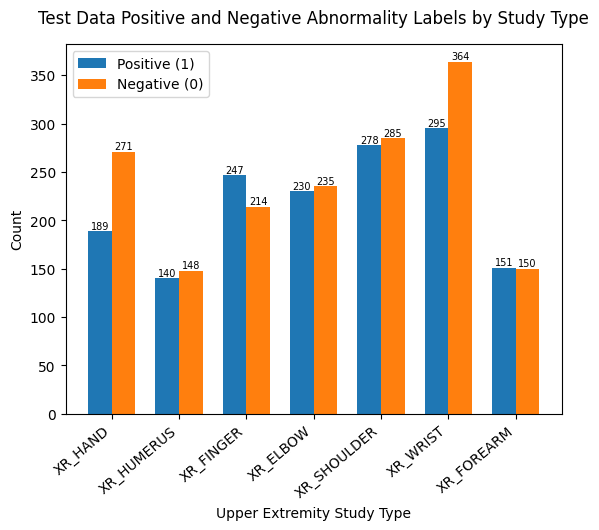

In [29]:
print_labels_by_study_type(df_test, "Test Data Positive and Negative Abnormality Labels by Study Type")

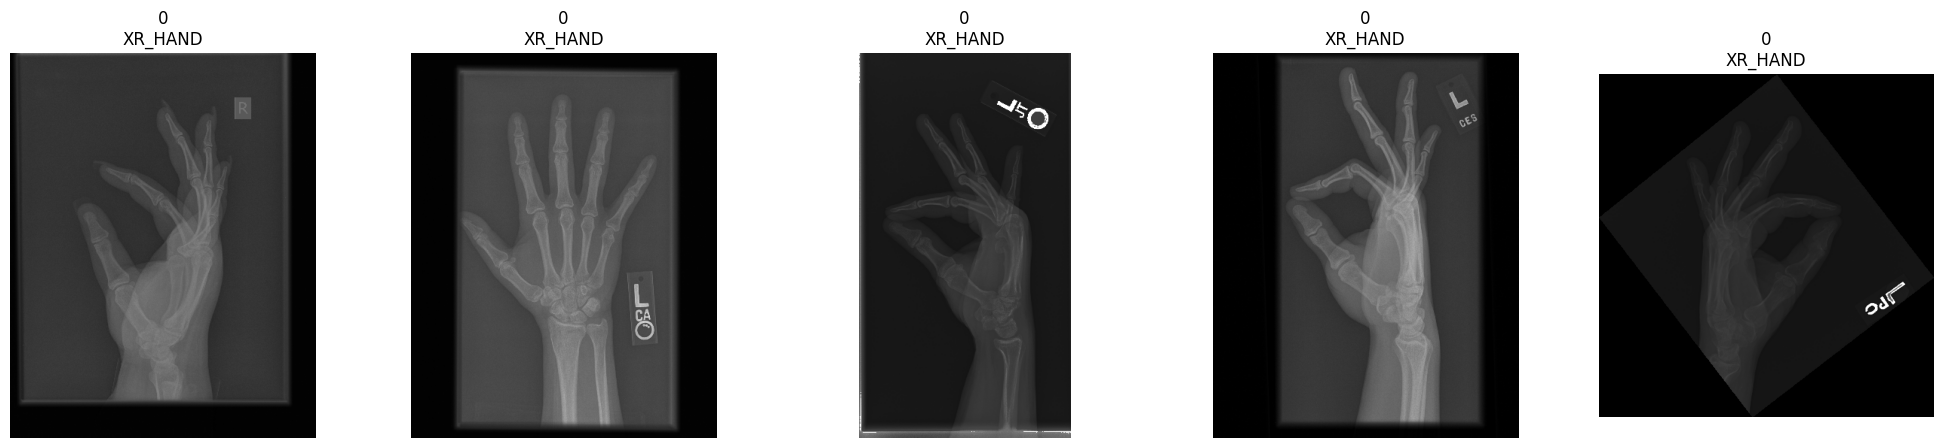

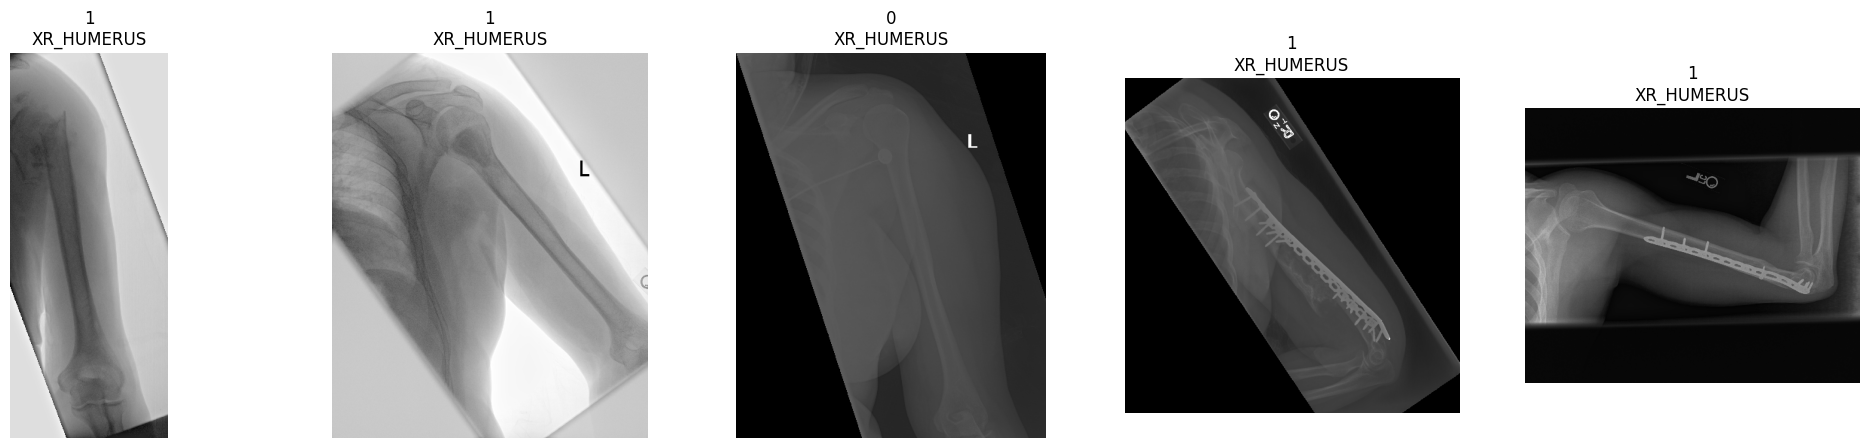

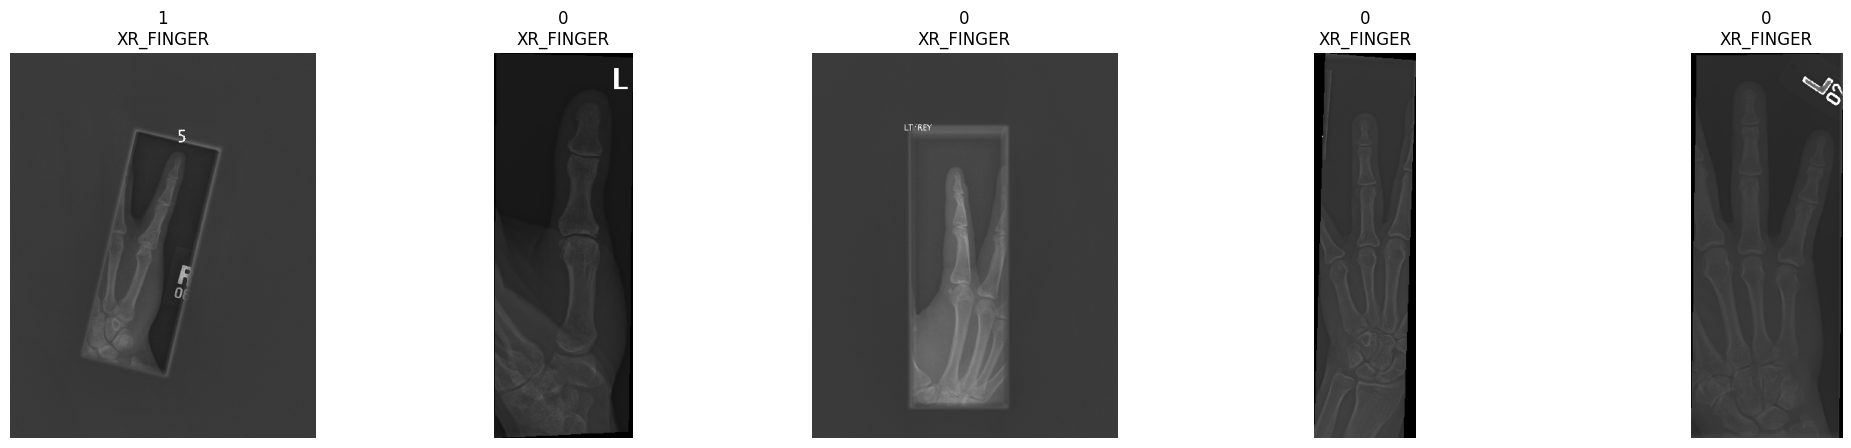

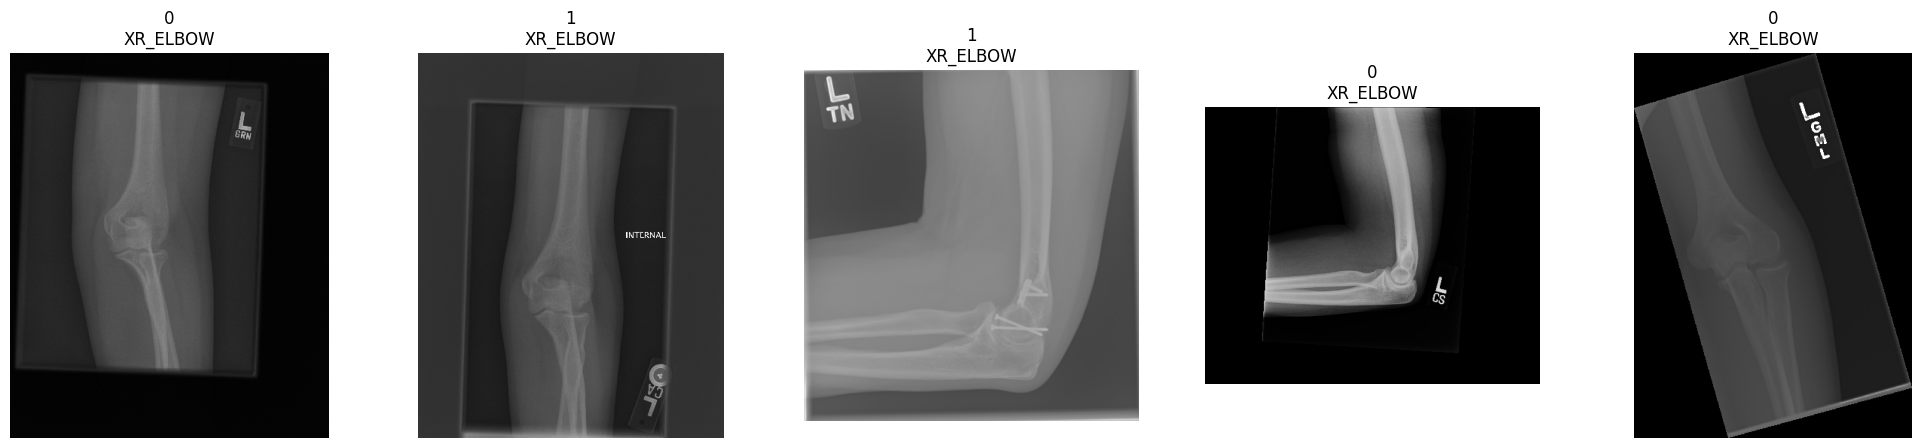

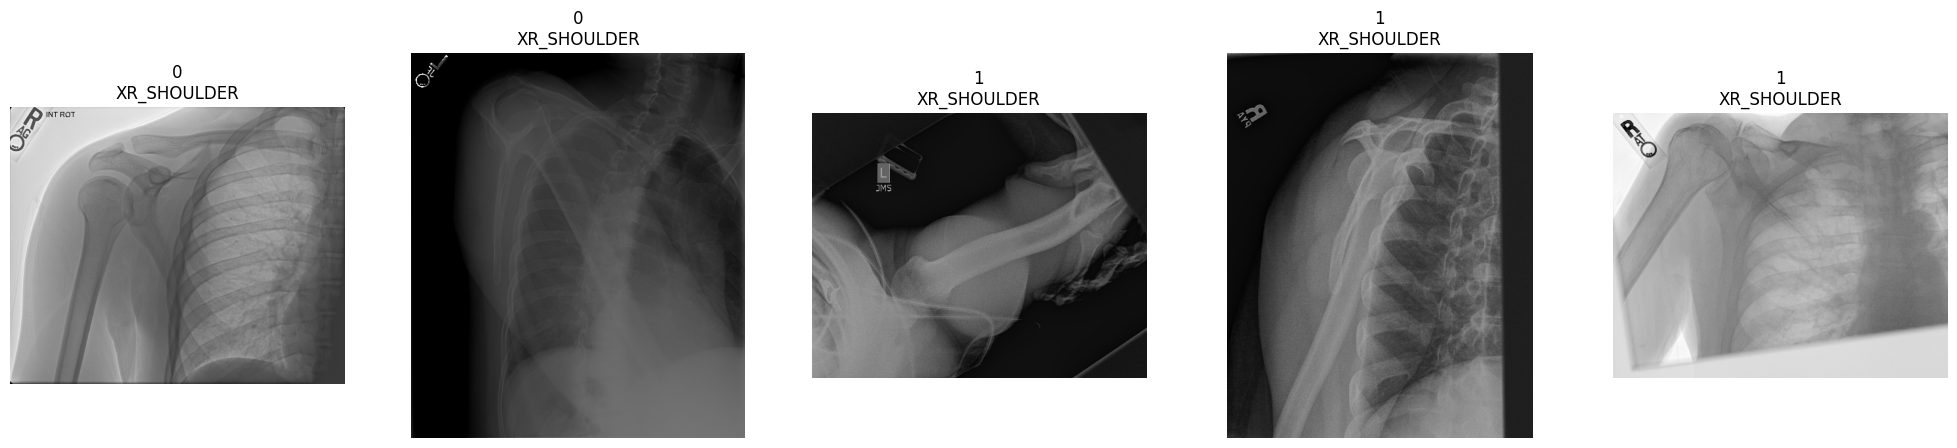

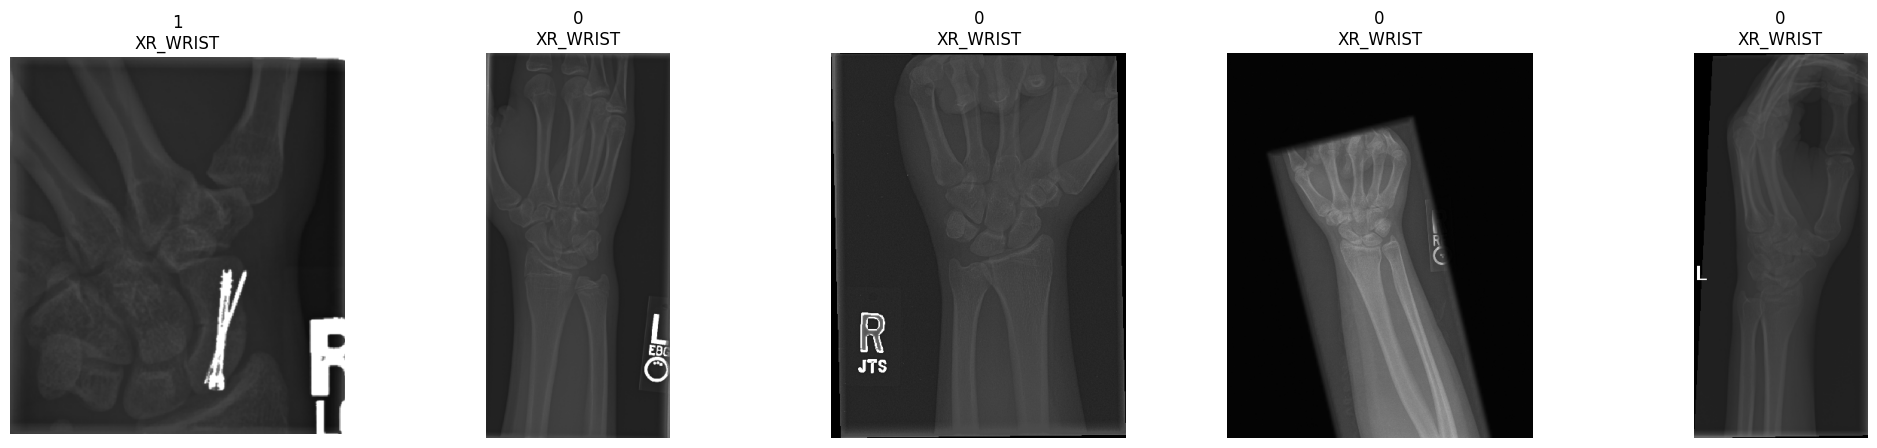

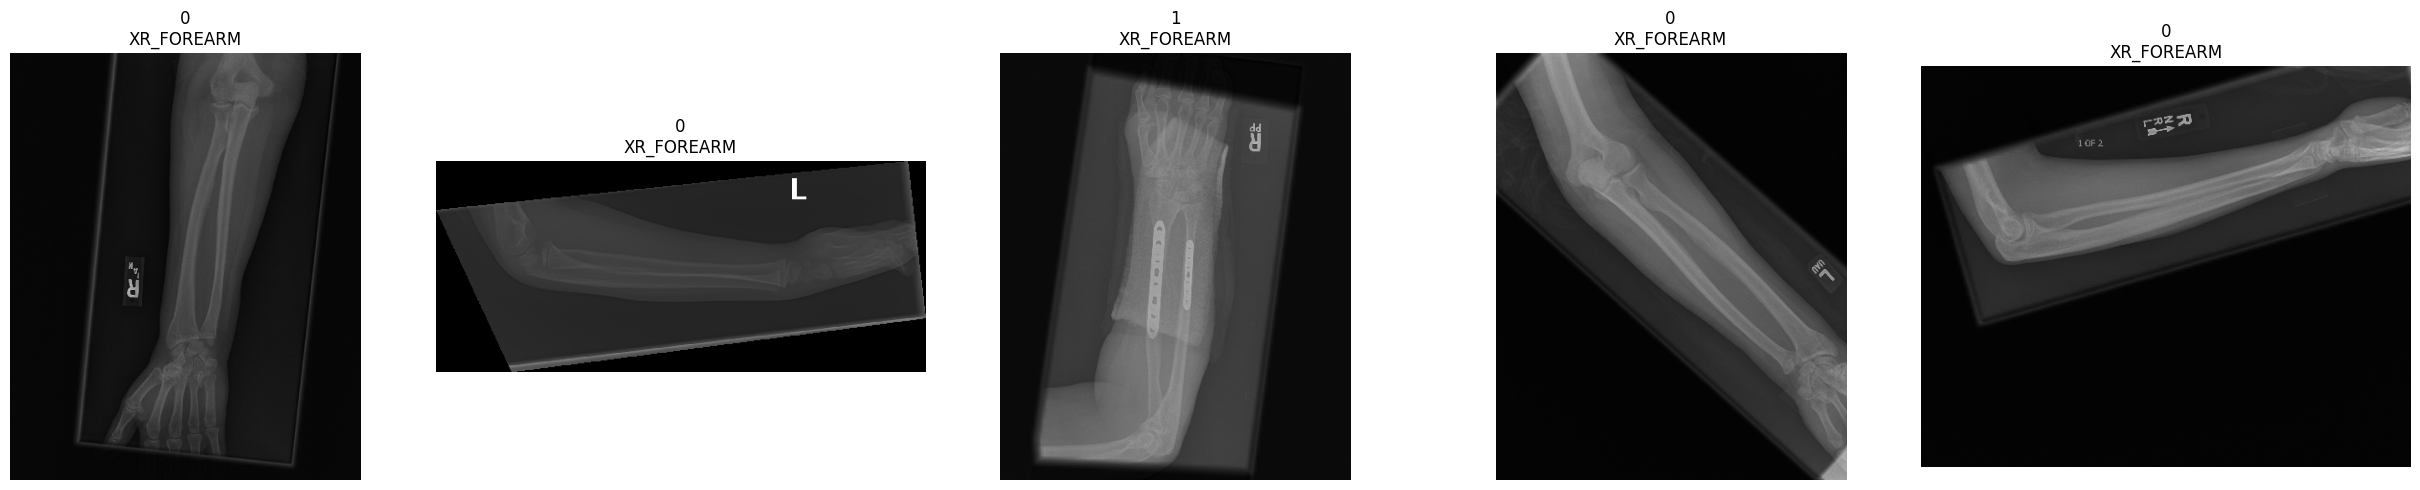

In [30]:
# Display sample of training images
for study_type in study_types:
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    imgs = df_train[df_train['study_type'] == study_type].sample(n = 5)
    for i, (image, label) in enumerate(zip(imgs['img_path'], imgs['label'])):
        image = load_img(image)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(label) + "\n" + study_type, fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
# Convert labels to str
df_train['label'] = df_train['label'].replace({0: '0', 1: '1'})
df_valid['label'] = df_valid['label'].replace({0: '0', 1: '1'})
df_test['label'] = df_test['label'].replace({0: '0', 1: '1'})

In [32]:
# Data augmentation
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 33128 validated image filenames belonging to 2 classes.


In [33]:
valid_generator = datagen.flow_from_dataframe(
    dataframe = df_valid,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3680 validated image filenames belonging to 2 classes.


In [34]:
test_generator = datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3197 validated image filenames belonging to 2 classes.


# DenseNet
the following resource was utilized havily as a resource to implement transfer learning with DenseNet:

https://www.kaggle.com/code/cafelatte1/alien-and-predator-classification-beginner/notebook

In [35]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import keras
import random as rnd
import pathlib
import math
import re
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sequential
from tensorflow.keras import applications as pretrained
from tensorflow.python.client import device_lib
from tensorflow.keras import losses
from tensorflow.keras import metrics
from keras.utils import plot_model

# --- Processor option ---
# GPU setup
try:
    gpu = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(gpu[0], True)
except:
    print("None of GPUs are detected")

2024-04-18 01:12:10.058779: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 01:12:10.085288: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 01:12:10.085538: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [36]:
# basic model parameters
cut_off = 0.5
epochs = 100

img_width = 224  # keep image sizes consistent with Michelle's code
img_height = 224
inputTensor = tf.keras.Input(shape=(img_width,img_height,3))


In [78]:
from sklearn.metrics import cohen_kappa_score

from keras import metrics
metricsVec = [
    metrics.BinaryAccuracy(threshold=cut_off),
    metrics.Precision(thresholds=cut_off),
    metrics.Recall(thresholds=cut_off),
    metrics.AUC(),
#     CohenKappa(num_classes=2),
#     cohen_kappa_score,
#     kappa_loss,
#     cohen_kappa,
#     cohen_kappa,
#     tf.python.ops.metric_ops.cohen_kappa,
]

# Creating pretrained DenseNet model
def CreatingTopLayers(featureTensor):
    topLayers = None
    topLayers = sequential([
                    layers.GlobalAveragePooling2D(),
                    layers.Dropout(0.2),
                    layers.Dense(units=1, activation="sigmoid")
    ], name="Top_Layers")
    return(topLayers)

# Loading the base model
model_base = sequential([
     # layers.experimental.preprocessing.Rescaling(input_shape=(img_height, img_width, 3), scale=1.0/255, name="Rescailing"),
     # data_augmentation,
     pretrained.DenseNet201(input_shape=(img_width, img_height, 3), weights="imagenet", include_top=False)], name="Base_DenseNet201")

model_base.trainable = False
model_base.summary()

featureTensor = model_base(inputTensor)
topLayers = CreatingTopLayers(featureTensor)

modified_model = sequential([model_base, topLayers], name="DenseNet201")
modified_model.summary()

modified_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*3),
    loss=losses.BinaryCrossentropy(from_logits=False),
    metrics=metricsVec)

def PlotingResult(his, result, name):
    acc = his.history['binary_accuracy']
    val_acc = his.history['val_binary_accuracy']
    loss = his.history['loss']
    val_loss = his.history['val_loss']
#     cohenk = his.history['cohen_kappa']
#     val_cohenk = his.history['val_cohen_kappa']

    plt.figure(figsize=(16, 16))
    plt.rc('font', size=12)

    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='upper left')
    title = 'Training and Validation Accuracy (' + his.model.name + ')'
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    title = 'Training and Validation Loss (' + his.model.name + ')'
    plt.title(title)
    
#     plt.subplot(2, 1, 1)
#     plt.plot(range(len(cohenk)), cohenk, label='Training Cohen Kappa')
#     plt.plot(range(len(val_cohenk)), val_cohenk, label='Validation Cohen Kappa')
#     plt.legend(loc='upper left')
#     title = 'Training and Validation Cohen Kappa (' + his.model.name + ')'
#     plt.title(title)
    plt.show()

    bestIdx = 0
    val_accuracy = 0
    val_precision = 0
    val_recall = 0
    val_auc = 0
    val_f1 = 0
#     val_ck = 0

    for i,j in his.history.items():
        if "val_loss" in i:
            bestIdx = np.argmin(j)
            val_loss = j[-1]

    for i,j in his.history.items():
        if "val_binary_accuracy" in i:
            val_accuracy = j[-1]
        elif "val_precision" in i:
            val_precision = j[-1]
        elif "val_recall" in i:
            val_recall = j[-1]
        elif "val_auc" in i:
            val_auc = j[-1]
#         elif "val_cohen_kappa" in i:
#             val_ck = j[-1]
    val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall)

    return [val_accuracy, val_f1, val_auc, val_loss, len(his.epoch)]

def SquareRootScheduler(epochCount, lr):
    return lr * pow(epochCount+1.0, -0.5)

cb_lrscheduler = tf.keras.callbacks.LearningRateScheduler(SquareRootScheduler)
cb_earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=math.floor(epochs*0.1))

Model: "Base_DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ ?                      │    18,321,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Model: "DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Base_DenseNet201 (Sequential)   │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Top_Layers (Sequential)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Text(0, 0.5, 'Learning rate')

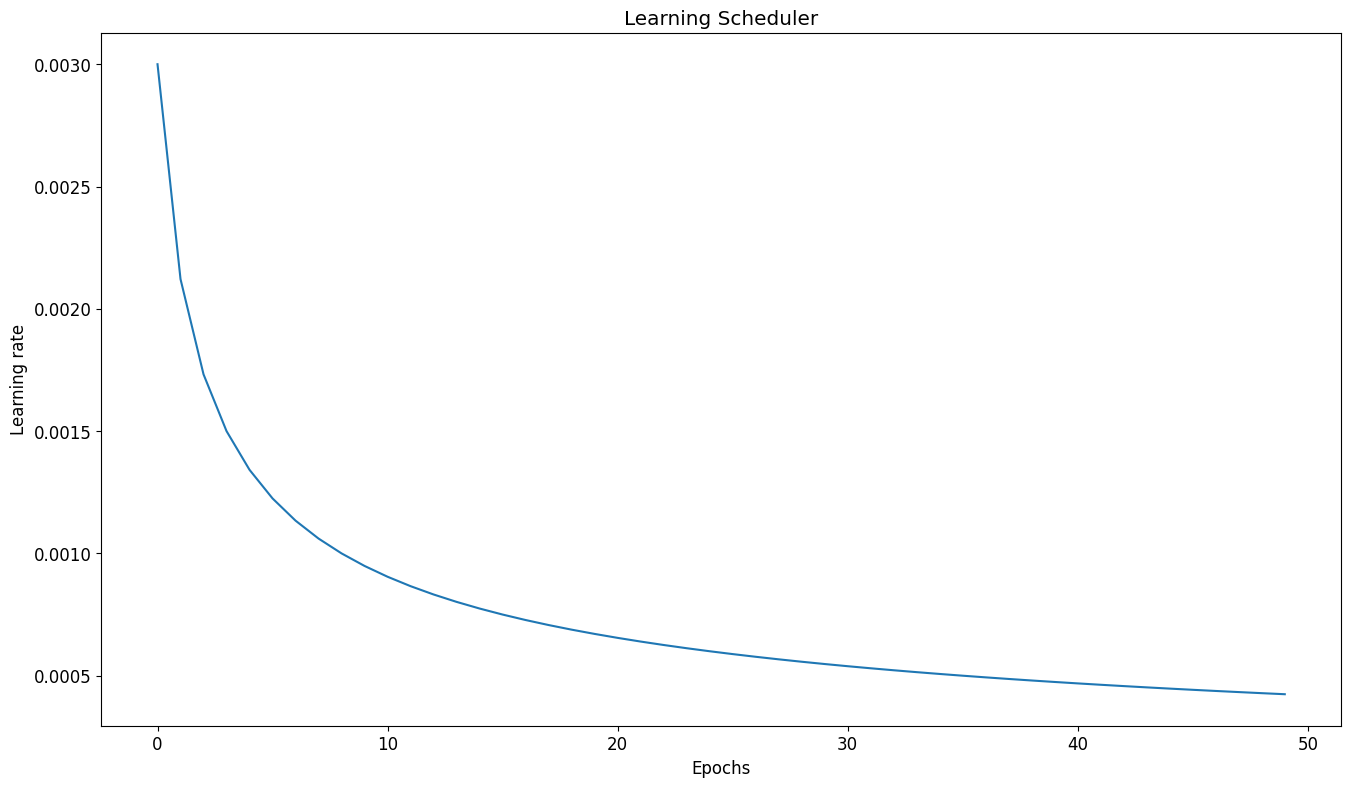

In [45]:
tmpEpochs = list(range(50))
tmpLr = list(map(lambda x: SquareRootScheduler(x, tf.keras.optimizers.Adam().get_config()["learning_rate"]*3), tmpEpochs))

plt.figure(figsize=(16, 9))
plt.rc('font', size=12)
plt.plot(tmpEpochs, tmpLr, label='Training Accuracy')
plt.title("Learning Scheduler")
plt.xlabel("Epochs")
plt.ylabel("Learning rate")

In [77]:

# code for saving model checkpoints
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints2/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Calculate the number of batches per epoch
import math
n_batches = len(train_generator) / batch_size
n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=30*n_batches)


In [79]:
result = pd.DataFrame({'Accuracy' : [None],
        'F1' : [None],
        'AUC' : [None],
#         'CohenKappa': [None],
        'Loss' : [None],
        'Epoch' : [None]                
})
result.index = ['DenseNet201']

# print(modelVec[3])
tf.random.set_seed(2000)
# model_DenseNet201 = None
# model_DenseNet201 = CreatingModels(modelVec[3])
model_DenseNet201 = modified_model
model_DenseNet201.save_weights(checkpoint_path.format(epoch=0))

history_DenseNet201 = None
history_DenseNet201 = model_DenseNet201.fit(
  train_generator,
  batch_size=None,
  validation_data=valid_generator,
  validation_batch_size=None,
  epochs=epochs,
  callbacks=[cb_lrscheduler, cp_callback, cb_earlystopping],
  verbose=1
)

Epoch 1/100
509/518 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - auc_2: 0.6812 - binary_accuracy: 0.6552 - loss: 0.6270 - precision_2: 0.5976 - recall_2: 0.4640
Epoch 1: saving model to checkpoints2/cp-0001.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 122s 200ms/step - auc_2: 0.6820 - binary_accuracy: 0.6558 - loss: 0.6265 - precision_2: 0.5985 - recall_2: 0.4647 - val_auc_2: 0.7780 - val_binary_accuracy: 0.7019 - val_loss: 0.5649 - val_precision_2: 0.6170 - val_recall_2: 0.6929 - learning_rate: 0.0030
Epoch 2/100
501/518 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - auc_2: 0.7584 - binary_accuracy: 0.7094 - loss: 0.5673 - precision_2: 0.6754 - recall_2: 0.5459
Epoch 2: saving model to checkpoints2/cp-0002.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 91s 174ms/step - auc_2: 0.7584 - binary_accuracy: 0.7095 - loss: 0.5673 - precision_2: 0.6755 - recall_2: 0.5458 - val_auc_2: 0.7871 - val_binary_accuracy: 0.7247 - val_loss: 0.5502 - val_precision_2: 0.7943 - val_recall_2: 0.4308 - learning_rate: 0.0021
Epoch 3/100

518/518 ━━━━━━━━━━━━━━━━━━━━ 87s 166ms/step - auc_2: 0.7771 - binary_accuracy: 0.7272 - loss: 0.5480 - precision_2: 0.7096 - recall_2: 0.5527 - val_auc_2: 0.7931 - val_binary_accuracy: 0.7378 - val_loss: 0.5343 - val_precision_2: 0.7451 - val_recall_2: 0.5343 - learning_rate: 2.6234e-09
Epoch 16/100
389/518 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - auc_2: 0.7778 - binary_accuracy: 0.7262 - loss: 0.5492 - precision_2: 0.7097 - recall_2: 0.5513
Epoch 16: saving model to checkpoints2/cp-0016.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 88s 167ms/step - auc_2: 0.7775 - binary_accuracy: 0.7265 - loss: 0.5491 - precision_2: 0.7095 - recall_2: 0.5516 - val_auc_2: 0.7931 - val_binary_accuracy: 0.7378 - val_loss: 0.5343 - val_precision_2: 0.7451 - val_recall_2: 0.5343 - learning_rate: 6.5586e-10
Epoch 17/100
381/518 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - auc_2: 0.7748 - binary_accuracy: 0.7268 - loss: 0.5503 - precision_2: 0.7002 - recall_2: 0.5516
Epoch 17: saving model to checkpoints2/cp-0017.weights.h

In [80]:
model_DenseNet201.save_weights('densenetmodel2.weights.h5')

In [83]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history_DenseNet201.history
# Save it under the form of a json file
json.dump(history_dict, open('densenetmodel2_history.json', 'w'))

In [ ]:
# load in model if desired
model = create_model()
model.load_weights('densenetmodel.weights.h5')

In [61]:
# test_data = test_generator
# print(test_data)
# # test_data = zip(test_data_x, test_data_y)
# y_true = []
# y_pred = []
# counter = 0
# for x, y in test_generator:
#     if counter > 1:
#         break
#     counter += 1
#     for idx, test_x in enumerate(x[:10]):
#         y_true.append(y[idx])
#         y_pred.append(model_DenseNet201.predict(x))
# print(f'{y_true} {len(y_true)}')
# print(f'{y_pred} {len(y_pred)}')
# print(f'Cohen Kappa: {cohen_kappa_score(y_true, y_pred)}')

[[[0.34509805 0.34509805 0.34509805]
  [0.3647059  0.3647059  0.3647059 ]
  [0.2627451  0.2627451  0.2627451 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.3254902  0.3254902  0.3254902 ]
  [0.3254902  0.3254902  0.3254902 ]
  [0.25882354 0.25882354 0.25882354]
  ...
  [0.18039216 0.18039216 0.18039216]
  [0.18039216 0.18039216 0.18039216]
  [0.21176472 0.21176472 0.21176472]]

 [[0.33333334 0.33333334 0.33333334]
  [0.30588236 0.30588236 0.30588236]
  [0.26666668 0.26666668 0.26666668]
  ...
  [0.16078432 0.16078432 0.16078432]
  [0.15686275 0.15686275 0.15686275]
  [0.18431373 0.18431373 0.18431373]]

 ...

 [[0.21568629 0.21568629 0.21568629]
  [0.21176472 0.21176472 0.21176472]
  [0.21960786 0.21960786 0.21960786]
  ...
  [0.23137257 0.23137257 0.23137257]
  [0.27450982 0.27450982 0.27450982]
  [0.33333334 0.33333334 0.33333334]]

 [[0.23137257 0.23137257 0.23137257]
  [0.227451   0.227451   0.227451  ]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[[0.24313727 0.24313727 0.24313727]
  [0.23529413 0.23529413 0.23529413]
  [0.227451   0.227451   0.227451  ]
  ...
  [0.2509804  0.2509804  0.2509804 ]
  [0.3019608  0.3019608  0.3019608 ]
  [0.427451   0.427451   0.427451  ]]

 [[0.21960786 0.21960786 0.21960786]
  [0.20784315 0.20784315 0.20784315]
  [0.19607845 0.19607845 0.19607845]
  ...
  [0.21960786 0.21960786 0.21960786]
  [0.25882354 0.25882354 0.25882354]
  [0.32156864 0.32156864 0.32156864]]

 [[0.22352943 0.22352943 0.22352943]
  [0.20784315 0.20784315 0.20784315]
  [0.19215688 0.19215688 0.19215688]
  ...
  [0.20000002 0.20000002 0.20000002]
  [0.2392157  0.2392157  0.2392157 ]
  [0.28627452 0.28627452 0.28627452]]

 ...

 [[0.28627452 0.28627452 0.28627452]
  [0.2509804  0.2509804  0.2509804 ]
  [0.227451   0.227451   0.227451  ]
  ...
  [0.18431373 0.18431373 0.18431373]
  [0.22352943 0.22352943 0.22352943]
  [0.25490198 0.25490198 0.25490198]]

 [[0.28627452 0.28627452 0.28627452]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


KeyboardInterrupt: 

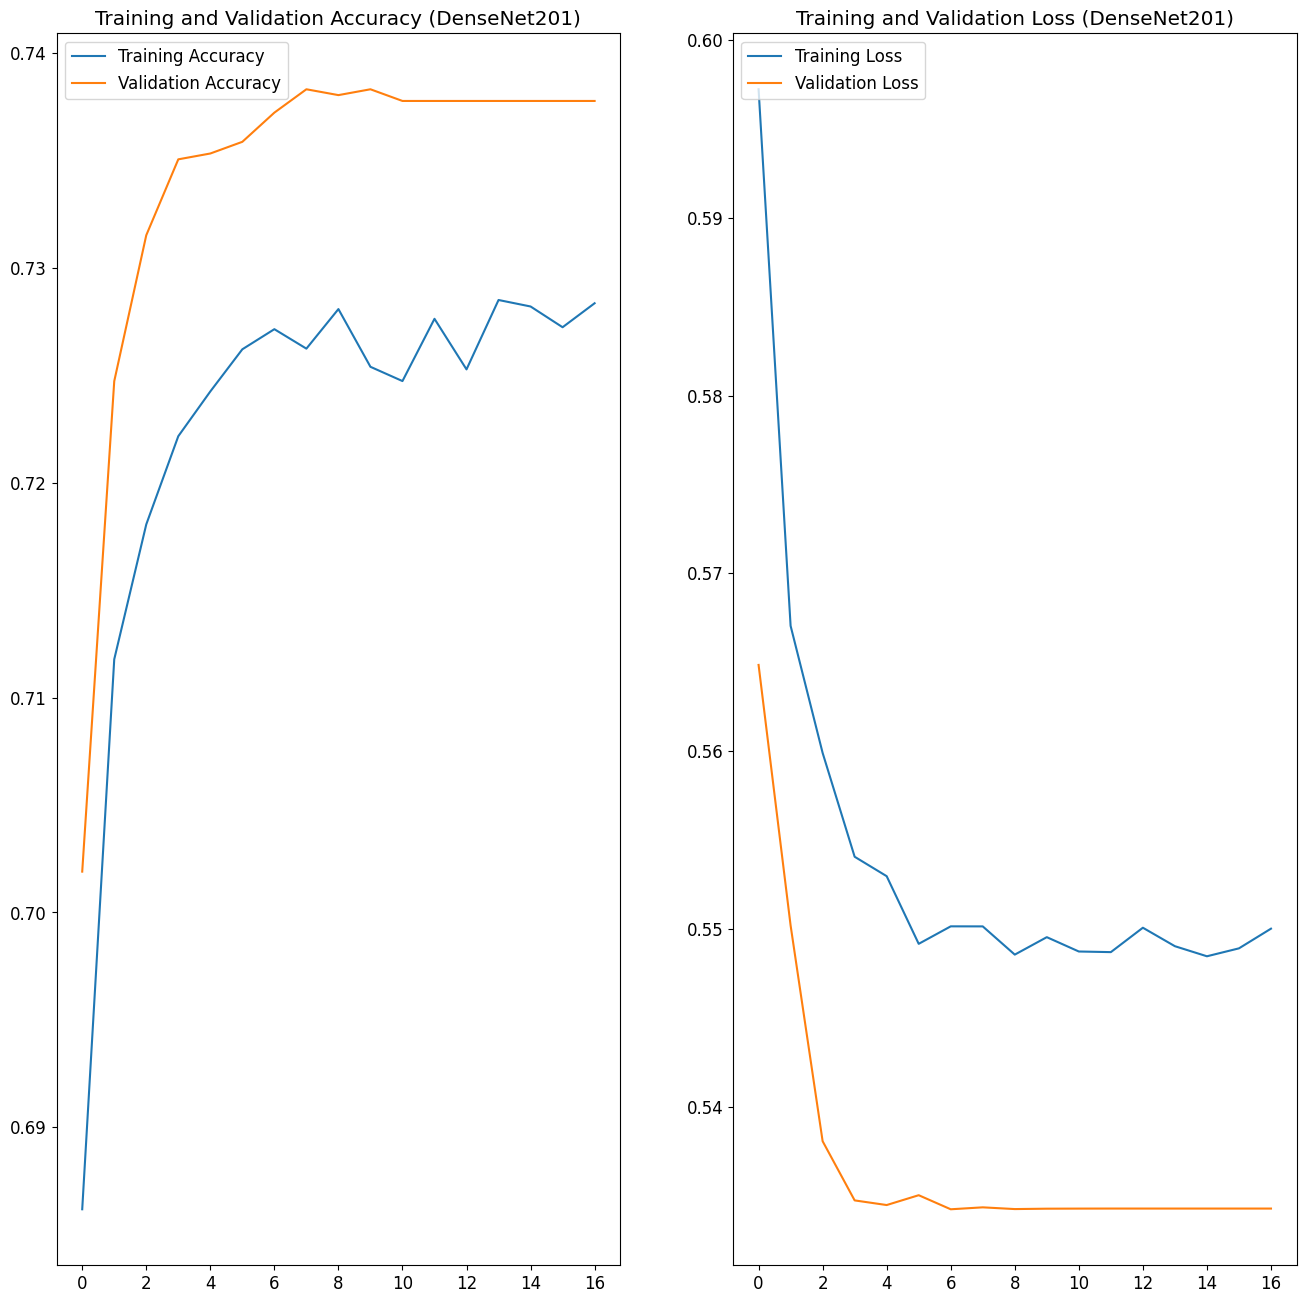

[0.73777174949646,
 0.6223092068318016,
 0.7931299805641174,
 0.5342724919319153,
 17]

In [81]:
result = PlotingResult(history_DenseNet201, result, 'DenseNet201')
result

AttributeError: 'NoneType' object has no attribute 'shape'